In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
dataset = pd.read_csv("//home//lydianjay//Documents//Data mining//dataset//penguins.csv")
dataset.replace('NA', np.nan, inplace = True)
dataset.replace(' ', np.nan, inplace = True)
dataset.dropna( inplace = True, how = 'any')
dataset = dataset[dataset.sex != '.']

xData = dataset.loc[ dataset["species"] == "Gentoo" ]

sns.set(rc={'figure.figsize':(10,6)})

most_frequent_class = xData["sex"].mode()[0]

predictions = [most_frequent_class] * len(xData)
conf_matrix = confusion_matrix(xData["sex"], predictions)
report = classification_report(xData["sex"], predictions, target_names=['Male', 'Female'], zero_division=1)
f1Score = f1_score(xData["sex"], predictions, pos_label=most_frequent_class, zero_division=1)



In [3]:
xData.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
152,153,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,female,2007
153,154,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,male,2007
154,155,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,female,2007
155,156,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,male,2007
156,157,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,male,2007


In [12]:
print(report)
print("F1 Score:", f1Score)

              precision    recall  f1-score   support

        Male       1.00      0.00      0.00        58
      Female       0.51      1.00      0.68        61

    accuracy                           0.51       119
   macro avg       0.76      0.50      0.34       119
weighted avg       0.75      0.51      0.35       119

F1 Score: 0.6777777777777777


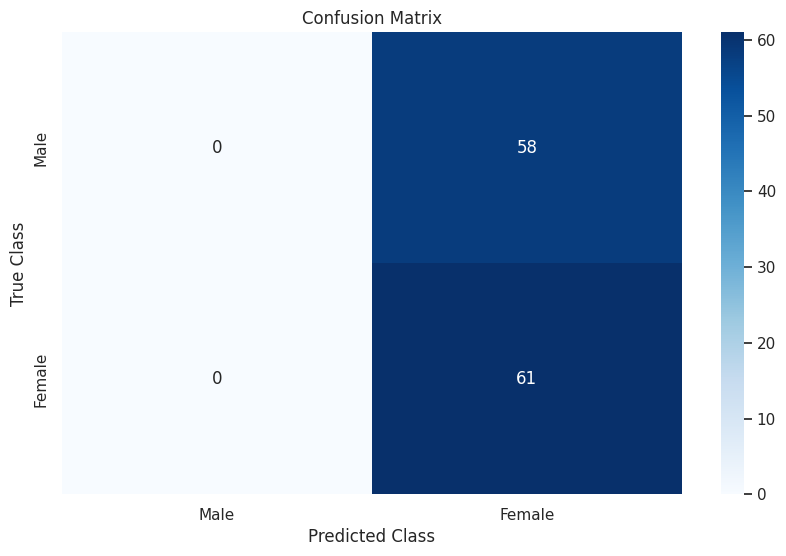

In [9]:
sns.set(font_scale=1)
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 12}, cmap='Blues', fmt='g', xticklabels=['Male', 'Female'], yticklabels=['Male', 'Female'])
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('True Class', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()


<AxesSubplot:xlabel='sex', ylabel='count'>

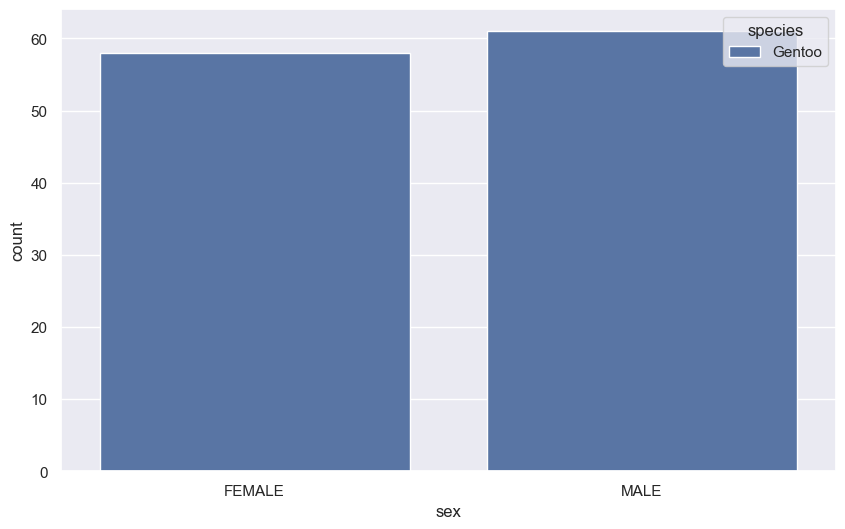

In [30]:
sns.countplot(data = xData, x = "sex", hue = "species")

In [12]:
print(xData.count())

119


In [62]:
mx = len(xData)
maleC = len(xData[ xData.sex == "MALE" ])
femaleC = len(xData[ xData.sex == "FEMALE" ])

print("male: ", maleC/mx * 100)
print("female: ", femaleC/mx * 100)

male:  51.26050420168067
female:  48.739495798319325
